# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [1]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("/home/mauricio/Escritorio/INFO267-master/milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

Package 'mclust' version 5.4.5
Type 'citation("mclust")' for citing this R package in publications.



     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

In [2]:
clus <-Mclust(datos, G=4)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

Ejercicio 1: 
a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.
b) Interprete y comente los resultados obtenidos. 

Mclust es una libreria que para modelos basados en clustering, clasificación y estimación de densidad basado en el modelado de mezclas.
Entreadas

-data: Vector numérico de observaciones.  Si la entrada es una matriz o data frame, las filas corresponden a observaciones y las columnas a variables.


-G: Un vector de enteros especificando el número de componentes de la mezcla (clusters) para los cuales se calculará el BIC.


-modelNames: Un vector de strings indicando los modelos a ser ajustados en la fase EM del clústering.



b)Se crearon grupos a partir de los componentes de la leche  y a partir de ello se asignaron animales para los que su leche tienen caracterśiticas en común .

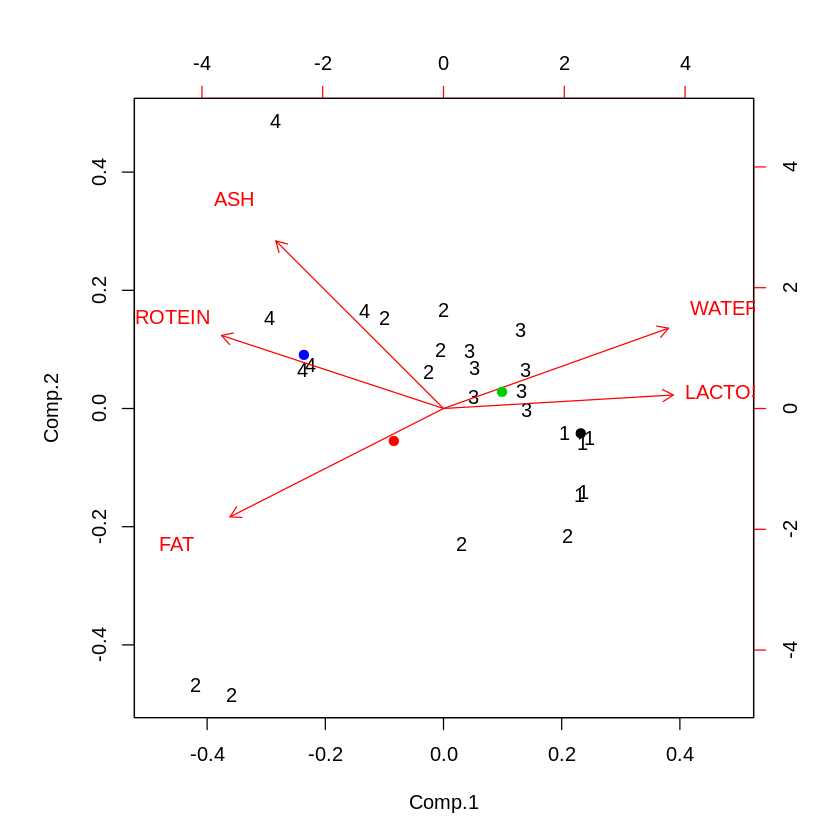

In [3]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


Ejercicio 2: Repita el procedimiento considerando 2, 3 y 4 grupos. Discuta y compare  sus resultados con aquellos obtenidos con k-means

Con 2 grupos:

In [4]:
clus2 <-Mclust(datos, G=2)
summary(clus2)
clus2

cl2 <- clus2$classification
centers2 <- t(clus2$parameters$mean)
centers2
cl2

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVV (ellipsoidal, equal volume) model with 2 components: 

 log-likelihood  n df       BIC       ICL
      -176.5541 25 40 -481.8633 -481.8762

Clustering table:
 1  2 
18  7 

'Mclust' model object: (EVV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
84.69570,5.001479,4.969356,4.821686,0.7596701
61.41853,9.328688,24.053235,2.356288,1.1297551


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          1          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2

Con 3 grupos

In [5]:
clus3 <-Mclust(datos, G=3)
summary(clus3)
clus3

cl3 <- clus3$classification
centers3 <- t(clus3$parameters$mean)
centers3
cl3

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 3 components: 

 log-likelihood  n df       BIC       ICL
      -144.2366 25 52 -455.8548 -455.8584

Clustering table:
 1  2  3 
14  5  6 

'Mclust' model object: (EEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
86.26361,3.879049,3.921919,5.221110,0.6421765
72.23683,7.520039,14.782487,3.660315,0.7079534
64.28310,10.566706,21.483587,1.983296,1.5083364


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         2          2          2          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          3          2

Con 4 grupos

In [6]:
clus4 <-Mclust(datos, G=4)
summary(clus4)
clus4

cl4 <- clus4$classification
centers4 <- t(clus4$parameters$mean)
centers4
cl4

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

Los animales van cambiando de grupo al variar el número de cluster

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

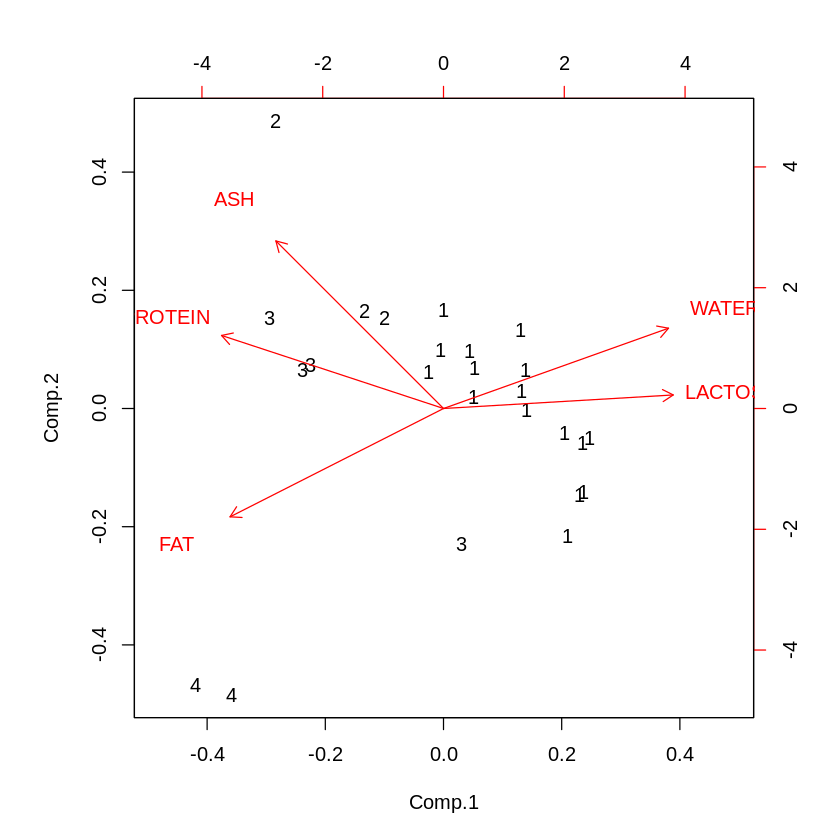

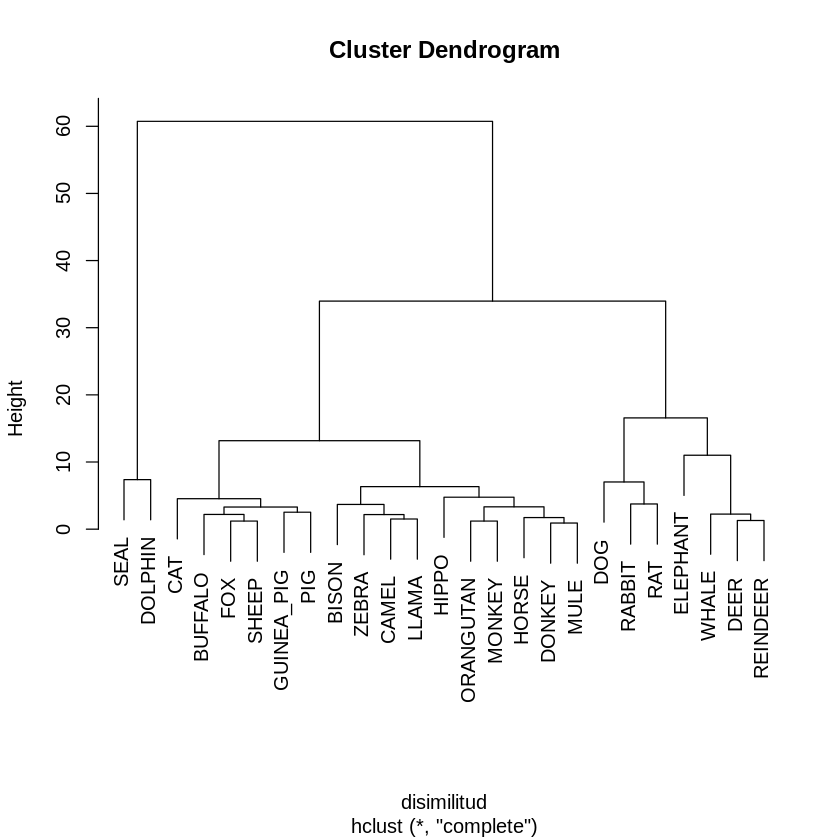

In [7]:
disimilitud <- dist(datos)
res3 <- hclust(disimilitud)
biplot(res, xlabs= cutree(res3,4))

plot(res3)

Ejercicio 3: 
a) Explique como funciona el método hclust, describa parámetros de entrada y salida.
b) Interprete y comente los resultados obtenidos. 
c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

a)hclust utiliza una matriz de disimilitud ,cuyas entradas son:


d: Matriz de disimilitud


method: puede ser unico,completo o el promedio de los datos


members:Es un vector de tamaño definido ,que por defecto es nulo


b)La salida es un dendograma

c)

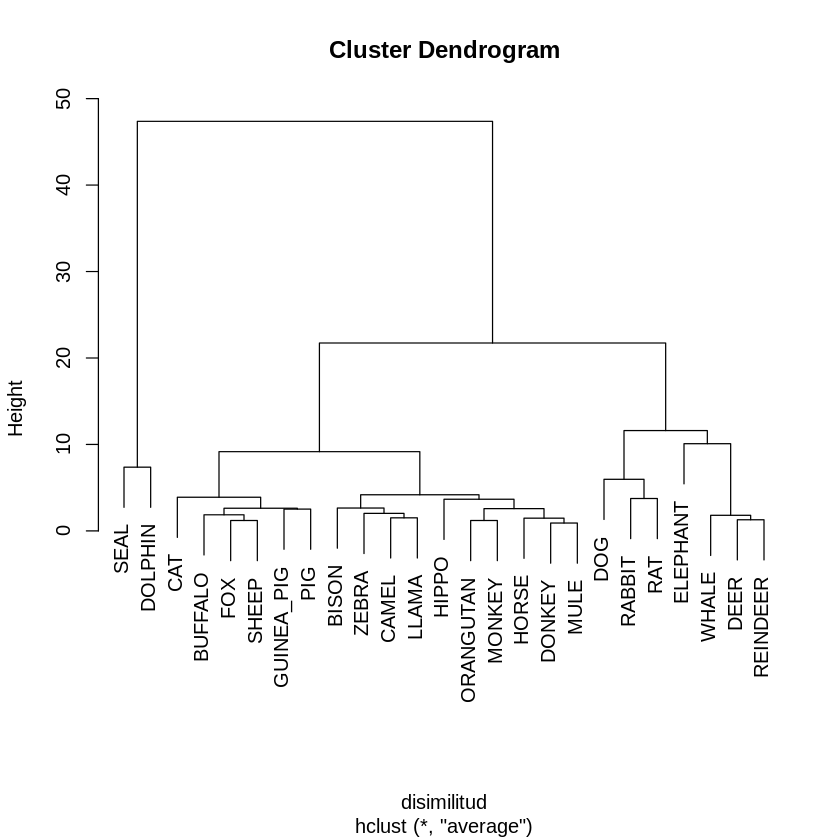

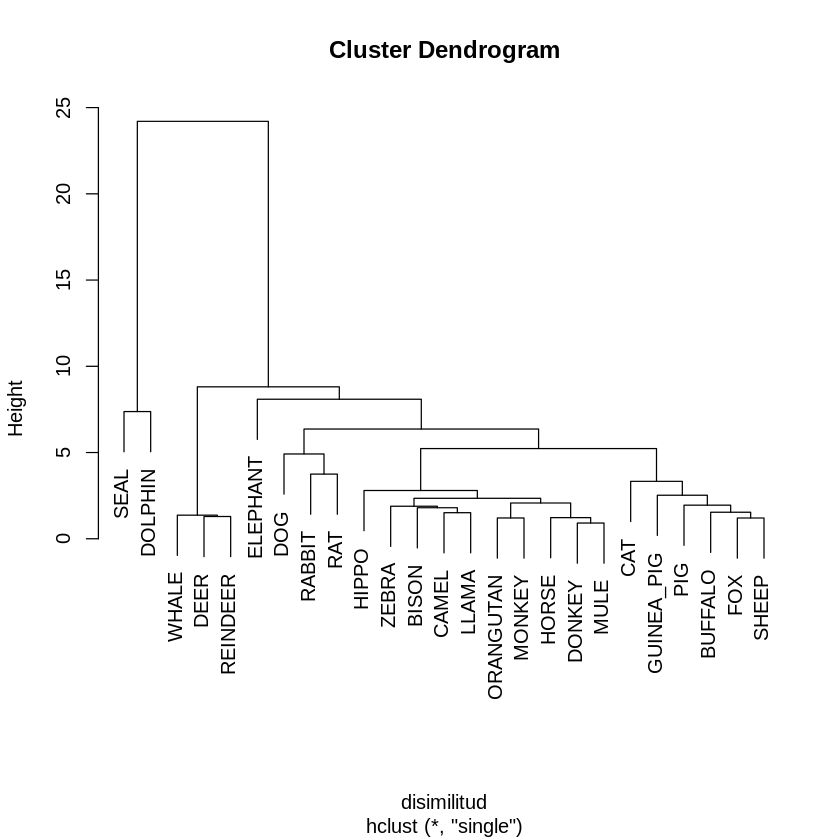

In [8]:
plot(hclust(disimilitud,method="average"))
plot(hclust(disimilitud,method="single"))

A pesar de utilizar metodos distintos para agrupar los datos,los dendogramas obtenidos como salida son muy similares 

In [10]:
Ejercicio 4: 
a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv
Interprete sus resultados.
b) Calcule alguna de las medidas de calidad estudiadas (purity, rand index o mutual information) 
para cada uno de los análisis realizado en (a). Discuta sus resultados.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:11: unexpected numeric constant
1: Ejercicio 4
              ^


a)

In [11]:
data<- read.csv("iris.csv",sep=",",header=TRUE )
ft <- data[2:5] 
especies<-data$Species
dis <- dist(ft)


Utilizando Kmeans

In [12]:
cl<-kmeans(ft,3,iter.max=1000,nstart=10)
res <- princomp(ft, cor=TRUE)
predict(res,cl$centers)
cl
table(especies,cl$cluster)

,Comp.1,Comp.2,Comp.3,Comp.4
1,-2.2201933,-0.2922248,0.04395511,0.01791615
2,1.9294933,-0.5951182,-0.01741106,0.01077987
3,0.6078858,0.6004150,-0.02477638,-0.02105552


K-means clustering with 3 clusters of sizes 50, 38, 62

Cluster means:
  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm
1      5.006000     3.418000      1.464000     0.244000
2      6.850000     3.073684      5.742105     2.071053
3      5.901613     2.748387      4.393548     1.433871

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Within cluster sum of squares by cluster:
[1] 15.24040 23.87947 39.82097
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

                 
especies           1  2  3
  Iris-setosa     50  0  0
  Iris-versicolor  0  2 48
  Iris-virginica   0 36 14

Utilizando GNM:

In [13]:

clus <-Mclust(ft, G=3)
clus
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl
table(especies,clus$classification)

'Mclust' model object: (VEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
5.006000,3.418000,1.464000,0.244000
5.915283,2.777258,4.203786,1.298823
6.546327,2.949694,5.481854,1.985306


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

                 
especies           1  2  3
  Iris-setosa     50  0  0
  Iris-versicolor  0 45  5
  Iris-virginica   0  0 50

In [19]:
cut<-cutree(hclust(dis),3)
ClusterPurity <- function(clusters, classes) {
  sum(apply(table(classes, clusters), 2, max)) / length(clusters)
}



print("Purity GMM:")
ClusterPurity(especies,clus$classification)
print("Purity Jerárquico:")
ClusterPurity(especies,cut)
print("Purity K-keans:")
ClusterPurity(especies,cl$cluster)


[1] "Purity GMM:"


[1] 0.9666667

[1] "Purity Jerárquico:"


[1] 0.84

[1] "Purity K-keans:"


ERROR: Error in cl$cluster: $ operator is invalid for atomic vectors


GMM posee mayor purity que los demás,por lo tanto es el mejor mode,lo